## Convolutional Neural Network 


In this notebook you will learn to distinguish dogs from cats!

Data:
https://drive.google.com/drive/folders/1nzVk4GOvKR6P87uPszUkKMPtaXV_wrZf?usp=sharing

Fill all the necessary gaps in cells below and fit neural networks for solving the binary classification task.

## Task 1:

1. Build and fit CNN with 3 convolutional layers for binary classification
2. Evaluate accuracy on test data
3. Plot the graphs for Loss(number_of_epochs) and Accuracy(number_of_epochs)

First, let's load all the necessary functions:

In [1]:
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from keras.applications import VGG16, Xception
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf 
from tensorflow.python.client import device_lib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import time

print(tf.__version__)
print(device_lib.list_local_devices())

2.14.0
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 15759452097252534140
xla_global_id: -1
]


In [2]:
plt.rcParams['figure.figsize'] = [6, 6]
plt.rcParams['font.size'] = 14
plt.rcParams['figure.facecolor'] = 'white'

The images collected for training and testing the deep learning model must be prepared: split the entire set into a training, validation and test sample, observing the balancing of classes (with binary classification they should be approximately equal in all three samples).

This has _already_ been done: in the Cats_and_Dogs directory there are three subdirectories: train, test and val - training, test and validation samples, respectively.

In [3]:
# Initialize the folders with train, test and validation datasets (in "/My Drive/..." or from your local repository where you have downloaded data):

train = 'C://Users//Daan_//Downloads//train'
val =   'C://Users//Daan_//Downloads//val'
test =  'C://Users//Daan_//Downloads//test'

# The shape of the RGB image
img_width, img_height, channels = 150, 150, 3 # you can try different sizes

# input shape
input_shape = (img_width, img_height, 3)
# position matters!
# Number_of_channels can be at the first or the last position
# in our case - "channels last"

# minibatch size
batch_size = 64
# train set size
nb_train_samples = 20000
# validation set size 
nb_validation_samples = 2490
# test set size
nb_test_samples = 2500

## Prepare the data.

You don’t have to manually change the shapes of 25000 images and convert them into the necessary format for keras (img_width, img_height, 3).

We will use the built-in image preprocessing function _ImageGenerator()_.

It performs scaling, resizes selected images and prepares batches (mini-samples) to train the model.

In [9]:
datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = datagen.flow_from_directory(
    train,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

val_generator = datagen.flow_from_directory(
    val,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

test_generator = datagen.flow_from_directory(
    test,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 20000 images belonging to 2 classes.
Found 2490 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.


Set the network architecture by sequentially adding layers to it:
1. A convolutional layer with 16 neurons, filter size 3x3. Activation function - 'relu'
2. MaxPooling layer with filter size 2x2.
3. A convolutional layer with 32 neurons, filter size 3x3. Activation function - 'relu'
4. MaxPooling layer with filter size 2x2.
5. A convolutional layer with 64 neurons, filter size 3x3. Activation function - 'relu'
6. MaxPooling layer with filter size 2x2.
7. Operation model.add (Flatten ()), which makes a one-dimensional vector of the resulting feature maps.
8. A fully connected layer with 64 neurons. Activation function - 'relu'
9. Use model.add (Dropout (0.5)) which excludes the edge from the current layer in the computational graph with a 50% probability to avoid overfitting.
10. A fully connected layer with 1 neuron. Activation function - 'sigmoid', because binary classification model.

Add to the model all the missing layers, by analogy with the already specified.
Keras documentation: https://keras.io/layers/about-keras-layers/

In [10]:
model = Sequential()

# 1: Convolutional
model.add(Conv2D(16, (3, 3), input_shape=(150, 150, 3)))
model.add(Activation('relu'))

# 2: Pooling
model.add(MaxPooling2D((2, 2)))

# 3: Convolutional
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))

# 4: Pooling
model.add(MaxPooling2D((2, 2)))

# 5: Convolutional
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))

# 6: Pooling
model.add(MaxPooling2D((2, 2)))

# 7: Flattening
model.add(Flatten())

# 8: Dense
model.add(Dense(64))
model.add(Activation('relu'))

# 9: Dropout
model.add(Dropout(0.5))

# 10:Dense
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [11]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [12]:
# use the generator to train the model (analogue of the fit method)
# 1 epoch of training on a CPU will take 4-6 minutes. The GPU is an ~order of magnitude faster.
# THE FIRST EPOCH USUALLY TAKES MUCH LARGER TIME AS KERAS SHOULD BUILD THE COMPUTATIONAL GRAPH

history1 = model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=20, # try different number of epochs: 10, 15, 20; check the loss and accuracy;
    validation_data=val_generator,
    validation_steps=nb_validation_samples // batch_size)

C:\Users\Daan_\AppData\Local\Temp\ipykernel_3980\1137171899.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history1 = model.fit_generator(


Epoch 1/20
312/312 [==============================] - 429s 1s/step - loss: 0.6076 - accuracy: 0.6597 - val_loss: 0.5185 - val_accuracy: 0.7582
Epoch 2/20
312/312 [==============================] - 336s 1s/step - loss: 0.4932 - accuracy: 0.7675 - val_loss: 0.4576 - val_accuracy: 0.7895
Epoch 3/20
312/312 [==============================] - 371s 1s/step - loss: 0.4346 - accuracy: 0.8012 - val_loss: 0.4276 - val_accuracy: 0.8088
Epoch 4/20
312/312 [==============================] - 318s 1s/step - loss: 0.3782 - accuracy: 0.8314 - val_loss: 0.4580 - val_accuracy: 0.7800
Epoch 5/20
312/312 [==============================] - 351s 1s/step - loss: 0.3360 - accuracy: 0.8555 - val_loss: 0.3711 - val_accuracy: 0.8335
Epoch 6/20
312/312 [==============================] - 350s 1s/step - loss: 0.2855 - accuracy: 0.8790 - val_loss: 0.3744 - val_accuracy: 0.8429
Epoch 7/20
312/312 [==============================] - 349s 1s/step - loss: 0.2496 - accuracy: 0.8942 - val_loss: 0.3876 - val_accuracy: 0.8425

In [13]:
# NOTE: if the accuracy on test data after 15 epochs is less than 80% smth goes wrong

scores1 = model.evaluate_generator(test_generator, nb_test_samples // batch_size)
print("Accuracy on test data: %.2f%%" % (scores1[1]*100))

C:\Users\Daan_\AppData\Local\Temp\ipykernel_3980\1721490788.py:3: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  scores1 = model.evaluate_generator(test_generator, nb_test_samples // batch_size)


Accuracy on test data: 85.14%


Plot the graphs: 

- Loss(Number of epochs)

- Accuracy(Number of epochs)

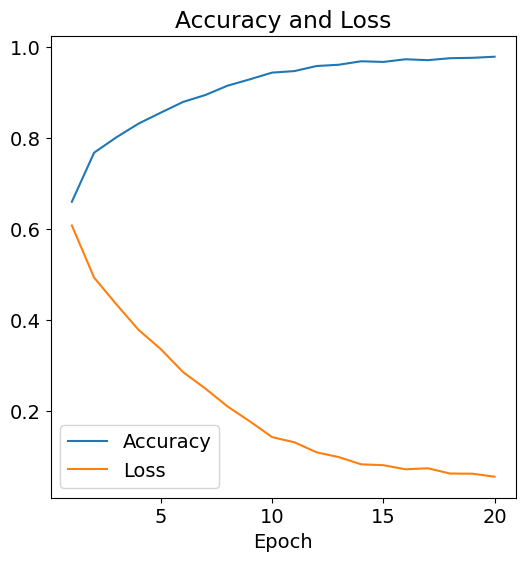

In [16]:
plt.plot(list(range(1, len(history1.history['accuracy'])+1)), history1.history['accuracy'], label='Accuracy')
plt.plot(list(range(1, len(history1.history['accuracy'])+1)), history1.history['loss'], label='Loss')
plt.title("Accuracy and Loss")
plt.xlabel("Epoch")
plt.legend()

Let's try to improve the quality of recognition, using the method of transfer lerning. 

We will use weights of deep neural networks already trained on large dataset such as  ImageNet, and provide fine tuning of several additional dense layers on new data relevant to the current classification task. The more new images will differ from those on which the network has been trained, the more layers will need to be “retrained” in order to get good classification accuracy. The intuition here is that the model has already learned how to highlight the necessary features on the images in the large dataset, it only needs to be “tweaked” for a specific task.

## Task 2

1. Build and fit Transfer Learning model using pre-trained VGG16-model weights from keras application.
2. Do the same with **another avaliable pre-trained deep learning model** from keras application https://keras.io/api/applications/.
2. Evaluate accuracy on test data for p.1 and p.2
3. Plot the graphs for Loss(number_of_epochs) and Accuracy(number_of_epochs)
4. Check the performance of your model with the custom image of cat or dog (so the model will tell which class this image belongs to). Develop the function for the inference of the best algorithm.

In [17]:
# First, download the weights of the VGG16 network trained on the ImageNet dataset:

vgg16_net = VGG16(weights='imagenet', 
                  include_top=False,      # we take only the "convolution" part, the last layers we add ourselves
                  input_shape=(150, 150, 3))
vgg16_net.trainable = False               # clearly prescribe that we do NOT overload the network.
                                          # Weights VGG16 in the process of learning will remain unchanged!

vgg16_net.summary()                       # pay attention to the number of trained and untrained parameters

58889256/58889256 [==============================] - 16s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                             

In [18]:
# add layers to VGG16:

model2 = Sequential()
model2.add(vgg16_net)

# Flattening
model2.add(Flatten())

# Dense fullyconnected layer with 256 neurons
model2.add(Dense(256))

# ReLu
model2.add(Activation('relu'))

# Dropout
model2.add(Dropout(0.5))

# Dense layer with 1 neuron
model2.add(Dense(1))

# Sigmoid
model2.add(Activation('sigmoid'))

model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 8192)              0         
                                                                 
 dense_4 (Dense)             (None, 256)               2097408   
                                                                 
 activation_10 (Activation)  (None, 256)               0         
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_5 (Dense)             (None, 1)                 257       
                                                                 
 activation_11 (Activation)  (None, 1)                

In [19]:
model2.compile(loss='binary_crossentropy',optimizer=Adam(lr=1e-5), metrics=['accuracy'])

In [20]:
# We also use the generator to train the model (similar to the fit method)
# Without using a GPU, learning 1 epoch of such a network will take about an hour. Plan your time =)
# If you have access to a GPU, you can try 10-12 epochs - the quality should increase even more.

history2 = model2.fit_generator(train_generator,steps_per_epoch=nb_train_samples // batch_size,epochs=5,validation_data=val_generator,validation_steps=nb_validation_samples // batch_size)

Epoch 1/5


C:\Users\Daan_\AppData\Local\Temp\ipykernel_3980\3205235342.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history2 = model2.fit_generator(


312/312 [==============================] - 3407s 11s/step - loss: 0.2954 - accuracy: 0.8725 - val_loss: 0.2243 - val_accuracy: 0.9128
Epoch 2/5
312/312 [==============================] - 3132s 10s/step - loss: 0.2289 - accuracy: 0.9013 - val_loss: 0.2391 - val_accuracy: 0.8947
Epoch 3/5
312/312 [==============================] - 3292s 11s/step - loss: 0.2082 - accuracy: 0.9128 - val_loss: 0.2151 - val_accuracy: 0.9169
Epoch 4/5
312/312 [==============================] - 3167s 10s/step - loss: 0.1912 - accuracy: 0.9193 - val_loss: 0.2069 - val_accuracy: 0.9169
Epoch 5/5
312/312 [==============================] - 3609s 12s/step - loss: 0.1741 - accuracy: 0.9271 - val_loss: 0.1980 - val_accuracy: 0.9235


In [21]:
scores2 = model2.evaluate_generator(test_generator, nb_test_samples // batch_size)
print("Accuracy on test data: %.2f%%" % (scores2[1]*100))

C:\Users\Daan_\AppData\Local\Temp\ipykernel_3980\66710458.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  scores2 = model2.evaluate_generator(test_generator, nb_test_samples // batch_size)


Accuracy on test data: 90.99%


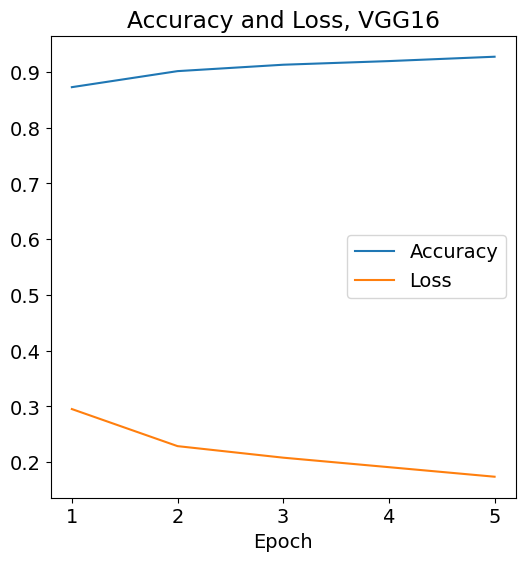

In [22]:
plt.plot(list(range(1, len(history2.history['accuracy'])+1)), history2.history['accuracy'], label='Accuracy')
plt.plot(list(range(1, len(history2.history['accuracy'])+1)), history2.history['loss'], label='Loss')
plt.title("Accuracy and Loss, VGG16")
plt.xlabel("Epoch")
plt.legend()

In [23]:
xception_net = Xception(include_top=False,weights="imagenet",input_shape=(150, 150, 3),classes=2,classifier_activation="softmax",)
xception_net.trainable = False
xception_net.summary()   

83683744/83683744 [==============================] - 19s 0us/step
Model: "xception"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 150, 150, 3)]        0         []                            
                                                                                                  
 block1_conv1 (Conv2D)       (None, 74, 74, 32)           864       ['input_2[0][0]']             
                                                                                                  
 block1_conv1_bn (BatchNorm  (None, 74, 74, 32)           128       ['block1_conv1[0][0]']        
 alization)                                                                                       
                                                                                                  
 block1_conv1_act (Activa

 block4_sepconv1_bn (BatchN  (None, 18, 18, 728)          2912      ['block4_sepconv1[0][0]']     
 ormalization)                                                                                    
                                                                                                  
 block4_sepconv2_act (Activ  (None, 18, 18, 728)          0         ['block4_sepconv1_bn[0][0]']  
 ation)                                                                                           
                                                                                                  
 block4_sepconv2 (Separable  (None, 18, 18, 728)          536536    ['block4_sepconv2_act[0][0]'] 
 Conv2D)                                                                                          
                                                                                                  
 block4_sepconv2_bn (BatchN  (None, 18, 18, 728)          2912      ['block4_sepconv2[0][0]']     
 ormalizat

 block7_sepconv1_act (Activ  (None, 9, 9, 728)            0         ['add_4[0][0]']               
 ation)                                                                                           
                                                                                                  
 block7_sepconv1 (Separable  (None, 9, 9, 728)            536536    ['block7_sepconv1_act[0][0]'] 
 Conv2D)                                                                                          
                                                                                                  
 block7_sepconv1_bn (BatchN  (None, 9, 9, 728)            2912      ['block7_sepconv1[0][0]']     
 ormalization)                                                                                    
                                                                                                  
 block7_sepconv2_act (Activ  (None, 9, 9, 728)            0         ['block7_sepconv1_bn[0][0]']  
 ation)   

                                                                                                  
 block9_sepconv3_bn (BatchN  (None, 9, 9, 728)            2912      ['block9_sepconv3[0][0]']     
 ormalization)                                                                                    
                                                                                                  
 add_7 (Add)                 (None, 9, 9, 728)            0         ['block9_sepconv3_bn[0][0]',  
                                                                     'add_6[0][0]']               
                                                                                                  
 block10_sepconv1_act (Acti  (None, 9, 9, 728)            0         ['add_7[0][0]']               
 vation)                                                                                          
                                                                                                  
 block10_s

 Normalization)                                                                                   
                                                                                                  
 block12_sepconv3_act (Acti  (None, 9, 9, 728)            0         ['block12_sepconv2_bn[0][0]'] 
 vation)                                                                                          
                                                                                                  
 block12_sepconv3 (Separabl  (None, 9, 9, 728)            536536    ['block12_sepconv3_act[0][0]']
 eConv2D)                                                                                         
                                                                                                  
 block12_sepconv3_bn (Batch  (None, 9, 9, 728)            2912      ['block12_sepconv3[0][0]']    
 Normalization)                                                                                   
          

In [24]:
model3 = Sequential()
model3.add(xception_net)

# Flattening
model3.add(Flatten())

# Dense fullyconnected layer with 256 neurons
model3.add(Dense(256))

# ReLu
model3.add(Activation('relu'))

# Dropout
model3.add(Dropout(0.5))

# Dense layer with 1 neuron
model3.add(Dense(1))

# Sigmoid
model3.add(Activation('sigmoid'))

model3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 5, 5, 2048)        20861480  
                                                                 
 flatten_3 (Flatten)         (None, 51200)             0         
                                                                 
 dense_6 (Dense)             (None, 256)               13107456  
                                                                 
 activation_12 (Activation)  (None, 256)               0         
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_7 (Dense)             (None, 1)                 257       
                                                                 
 activation_13 (Activation)  (None, 1)                

In [25]:
model3.compile(loss='binary_crossentropy',optimizer=Adam(lr=1e-5),metrics=['accuracy'])

In [26]:
history3 = model3.fit_generator(train_generator,steps_per_epoch=nb_train_samples // batch_size,epochs=5,validation_data=val_generator,validation_steps=nb_validation_samples // batch_size)

C:\Users\Daan_\AppData\Local\Temp\ipykernel_3980\3237416890.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history3 = model3.fit_generator(


Epoch 1/5
312/312 [==============================] - 1788s 6s/step - loss: 0.2589 - accuracy: 0.9510 - val_loss: 0.1056 - val_accuracy: 0.9622
Epoch 2/5
312/312 [==============================] - 1771s 6s/step - loss: 0.0940 - accuracy: 0.9645 - val_loss: 0.0971 - val_accuracy: 0.9593
Epoch 3/5
312/312 [==============================] - 1761s 6s/step - loss: 0.0850 - accuracy: 0.9681 - val_loss: 0.0915 - val_accuracy: 0.9659
Epoch 4/5
312/312 [==============================] - 1799s 6s/step - loss: 0.0741 - accuracy: 0.9728 - val_loss: 0.1002 - val_accuracy: 0.9622
Epoch 5/5
312/312 [==============================] - 1801s 6s/step - loss: 0.0695 - accuracy: 0.9742 - val_loss: 0.0946 - val_accuracy: 0.9601


In [27]:
scores3 = model3.evaluate_generator(test_generator, nb_test_samples // batch_size)
print("Accuracy on test data: %.2f%%" % (scores3[1]*100))

C:\Users\Daan_\AppData\Local\Temp\ipykernel_3980\4008824435.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  scores3 = model3.evaluate_generator(test_generator, nb_test_samples // batch_size)


Accuracy on test data: 95.59%


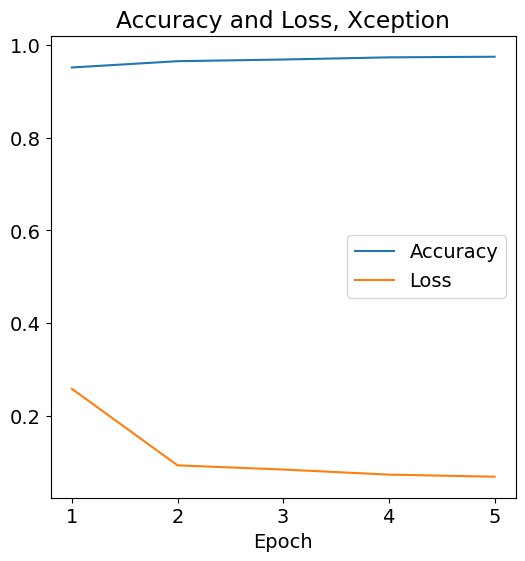

In [28]:
plt.plot(list(range(1, len(history3.history['accuracy'])+1)), history3.history['accuracy'], label='Accuracy')
plt.plot(list(range(1, len(history3.history['accuracy'])+1)), history3.history['loss'], label='Loss')
plt.title("Accuracy and Loss, Xception")
plt.xlabel("Epoch")
plt.legend()

## Test (own image)

In [44]:
img = cv2.imread('C://Users//Daan_//Downloads//Elis.jpg')
img = np.array(img) / 255
img = np.expand_dims(img, axis=0)
img.shape

(1, 150, 150, 3)

In [45]:
print(f"CNN:     \t{model.predict(img)}")  
print(f"VGG16:   \t{model2.predict(img)}") 
print(f"Xception:\t{model3.predict(img)}")

1/1 [==============================] - 0s 425ms/step
CNN:     	[[0.999895]]
1/1 [==============================] - 1s 514ms/step
VGG16:   	[[0.16282907]]
1/1 [==============================] - 1s 1s/step
Xception:	[[0.99953246]]


## Best Algorithm

In [46]:
def ch_cl(list_of_models, train_gen, test_gen, val_gen, train_num, test_num, val_num, batch_size, epochs):
    
    acc_val_list = []
    acc_test_list = []
    time_list = []
    
    for i, m in enumerate(list_of_models):
        t = time.time()
        cur = m.fit_generator(train_gen,steps_per_epoch=train_num // batch_size,epochs=epochs,validation_data=val_gen,validation_steps=val_num // batch_size)
        
        sc = m.evaluate_generator(test_gen, test_num // batch_size)
        t = time.time() - t
        
        acc_val_list.append(cur.history['accuracy'][-1])
        acc_test_list.append(sc[1]*100)
        time_list.append(t)
        
        print("i\tACC. VAL.\tACC. TEST\t\tTIME")
        print(f"{i}\t{cur.history['accuracy'][-1]:.8f}\t{sc[1]:.8f}\t{t}")
    
    return np.argmax(acc_test_list)

In [47]:
mod = [model, model2, model3]

mejor = ch_cl(list_of_models=mod,train_gen=train_generator,test_gen=test_generator,val_gen=val_generator,train_num=nb_train_samples,test_num=nb_test_samples,val_num=nb_validation_samples,batch_size=batch_size,epochs=1)

C:\Users\Daan_\AppData\Local\Temp\ipykernel_3980\2116907800.py:10: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  cur = m.fit_generator(


312/312 [==============================] - 417s 1s/step - loss: 0.0494 - accuracy: 0.9800 - val_loss: 0.8097 - val_accuracy: 0.8557


C:\Users\Daan_\AppData\Local\Temp\ipykernel_3980\2116907800.py:17: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  sc = m.evaluate_generator(test_gen, test_num // batch_size)


i	ACC. VAL.	ACC. TEST		TIME
0	0.98003614	0.85416669	430.78336930274963
312/312 [==============================] - 15013s 48s/step - loss: 0.1623 - accuracy: 0.9330 - val_loss: 0.2172 - val_accuracy: 0.9116
i	ACC. VAL.	ACC. TEST		TIME
1	0.93303573	0.90184295	15393.955039739609
312/312 [==============================] - 3619s 12s/step - loss: 0.0655 - accuracy: 0.9754 - val_loss: 0.1042 - val_accuracy: 0.9630
i	ACC. VAL.	ACC. TEST		TIME
2	0.97542137	0.96033657	3802.7637543678284


In [48]:
print(mejor)

2


We can see that the program ranked number ***"2"***, which is ***Xception***, as the ***best***.